# Ejercicio 1

Mediante el dataset de datos oficiales de la UEFA, seleccionar un atributo del conjunto de datos, calcular el p-valor, y decir si se rechaza la hipótesis nula tomando un nivel de significación, alfa, del 5%.

Lo que podemos aplicar a un solo atributo es, por ejemplo, el averiguar si cumple o no una distribución normal (u otra distribución, para el caso).
De todos modos, comencemos explorando un poco los datos.

In [39]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
dataset_UEFA = pd.read_csv(r'Lligues europees UEFA.csv', encoding = 'ANSI', sep=';')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset_UEFA.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [5]:
dataset_UEFA.tail()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul
97,98,Greuther Fürth,GER,18,34,3,9,22,28,82,-54,18,0.53,30.7,60.3,-29.6,-0.87,D L D L L,7672,Branimir Hrgota - 9,Sascha Burchert


Tenemos 98 equipos que participan de la (entiendo yo) liguilla de la UEFA, y lo que tenemos son fundamentalmente los resultados obtenidos durante la competición.

In [6]:
dataset_UEFA.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [7]:
dataset_UEFA.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [8]:
'''
Rk = Rank
LgRk = League Rank
MP = Matches Played
W = Wins
D = Draws
L = Lost
GF = Goals in favour
GA = Goals against
GD = Goal difference, GF-GA
Pts = Points
Pts/G = Points per goal
xG = number of expected goals
xGA= number of expected goals against
xGD = difference in expected goals (in favour and against)
xGD/90 = difference in expected goals per each 90 minutes.
Attendance = people attending each match, in average

Nota: parte de la interpretación viene de leerse lo que sigue:  https://expectedscore.com/faq/how-to-use-the-xg-tables/
'''

'\nRk = Rank\nLgRk = League Rank\nMP = Matches Played\nW = Wins\nD = Draws\nL = Lost\nGF = Goals in favour\nGA = Goals against\nGD = Goal difference, GF-GA\nPts = Points\nPts/G = Points per goal\nxG = number of expected goals\nxGA= number of expected goals against\nxGD = difference in expected goals (in favour and against)\nxGD/90 = difference in expected goals per each 90 minutes.\nAttendance = people attending each match, in average\n\nNota: parte de la interpretación viene de leerse lo que sigue:  https://expectedscore.com/faq/how-to-use-the-xg-tables/\n'

En todo caso, si vamos a testar la normalidad de una variable, podemos ensayar alguno de los siguientes tests:
* Shapiro-Wilk Test
* D’Agostino’s K^2 Test
* Anderson-Darling Test

Tomemos, por ejemplo, el test de Shapiro-Wilk, y apliquémoslo a los goles a favor ('GF') de la lista de equipos.

En este caso no es necesario normalizar, en el sentido de que no cabe esperar interferencia de otras variables (no las habrá, en este test).

In [9]:
# Test de normalidad de Shapiro-Wilk
from scipy.stats import shapiro
data = dataset_UEFA.GF
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:  # Con nivel de significación 0,05: si p está por encima de 0,05 probablemente SÍ tenemos distribución gaussiana (a.k.a. normal).
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')  # Con nivel de significación 0,05: si p está por debajo de 0,05 probablemente NO tenemos distribución normal o gaussiana.
# Nota: ejemplo adaptado de:  https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

stat=0.943, p=0.000
Probably not Gaussian


<Axes: xlabel='GF', ylabel='Count'>

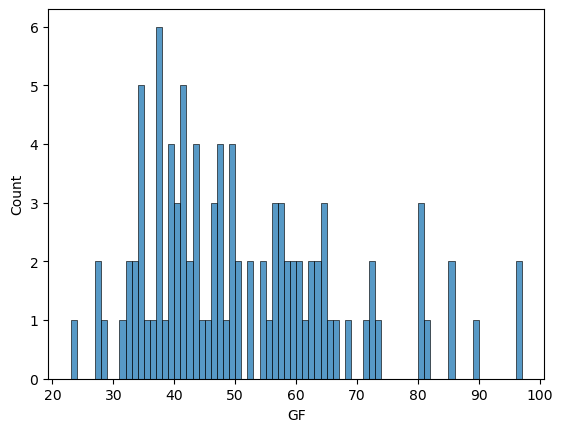

In [10]:
sns.histplot(data=dataset_UEFA, x="GF", binwidth=1)   # https://seaborn.pydata.org/generated/seaborn.histplot.html

En efecto, la gráfica que vemos concuerda con el resultado del test de normalidad de Shapiro-Wilk. Claramente no se observa la típica forma de campana de la distribución normal.

Además de ello, incluso parece observarse un cierto "skewness" o sesgo hacia la derecha, si bien los datos parecen pocos para afirmar nada de forma taxativa.

# Ejercicio 2

Con el mismo dataset, seleccionar otros dos atributos, calcular el p-valor, y decir si se rechaza la hipótesis nula o no, con un nivel de significación, alfa, del 5%.

Bueno, en este caso podríamos lanzar unan comparación entre dos atributos, el ranking en la liga ('LgRk') y el ranking UEFA ('Rk') y comprobar si están correlacionados, lanzando un test de correlación de Pearson.

In [11]:
# Coeficiente de correlación de Pearson y valor p
correlation_coefficient, p_value = pearsonr(dataset_UEFA['Rk'], dataset_UEFA['LgRk'])

print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

if p_value < 0.05:  # Implica un nivel de significación de 0.05.
    print('Con un nivel de significación de 0.05, hay una correlación lineal significativa entreranking UEFA y posición en la liga nacional.')
else:
    print('Con un nivel de significación del 0.05, no vemos correlación lineal sgnificativa entre ranking en liga y ranking UEFA.')

Pearson Correlation Coefficient: 0.9881300680335244
p-value: 6.510546572175124e-80
Con un nivel de significación de 0.05, hay una correlación lineal significativa entreranking UEFA y posición en la liga nacional.


Parece muy claro, en base a los números que hay correlación (el coeficiente de correlación es altísimo). Veámoslo en una representación del ranking en la liga y el ranking UEFA:

<Axes: xlabel='LgRk', ylabel='Rk'>

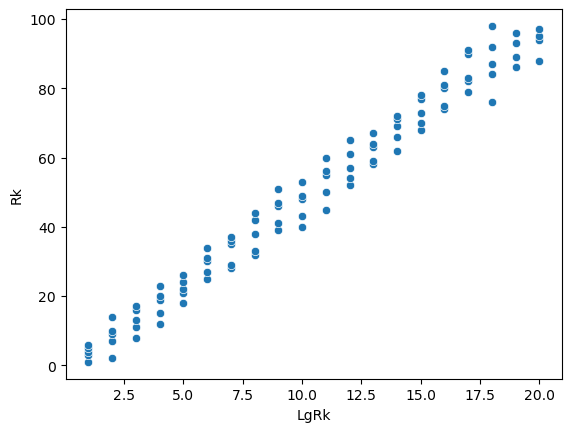

In [12]:
#sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.scatterplot(x = dataset_UEFA['LgRk'], y= dataset_UEFA['Rk'])

Además de verse un coeficiente de correlación muy elevado, la representación gráfica también nos muestra que hay una relación muy lineal entre el "ranking UEFA", y el "ranking en la liga". Tanto es así, que cabe sospechar que el "ranking en la liga" está -valga la redundancia- directamente relacionado con el "ranking UEFA".

# Ejercicio 3

Continuar con el mismo conjunto de datos, seleccionar tres atributos, calcular el p-valor y decir si se rechaza la hipótesis nula tomando un alfa del 5%.

In [14]:
dataset_UEFA[0:2]

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson


In [18]:
dataset_UEFA.Country.unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

Para trabajar con tres atributos, podríamos plantearnos lo siguiente. Pongamos por caso que queremos comparar si hay diferencias significativas en cuanto a la asistencia media de público a los partidos de los equipos de tres países distintos. Por ejemplo, Inglaterra, Italia y España. Podríamos plicar un test ANOVA para determinar si hay diferencias entre estas tres -llamémosles- "sub-variables".

In [34]:
dataset_UEFA[dataset_UEFA['Country'] == 'ENG']['Attendance'].mean()

39538.7

In [36]:
dataset_UEFA[dataset_UEFA['Country'] == 'ITA']['Attendance'].mean()

17062.45

In [37]:
dataset_UEFA[dataset_UEFA['Country'] == 'ESP']['Attendance'].mean()

22937.6

La diferencia de las medias es notable, en el caso de Inglaterra. ¿Cabe la posibilidad de que la diferencia se deba al azar? Hagamos un test ANOVA para determinarlo.

Nuestra hipótesis nula será que los valores de público promedio en los partidos de esos países no tiene diferencias significativas, a nuestro nivel de significación (0.05).

La hipótesis alternativa será que la media de público en los partidos de al menos uno de los países muestra diferencias significativas respecto de los otros (no nos dice qué diferencia, solamente que SÍ hay diferencia).

In [40]:
# Público en los partidos de los diferentes equipos de estos tres países
eng_attendance = dataset_UEFA[dataset_UEFA['Country'] == 'ENG']['Attendance']
ita_attendance = dataset_UEFA[dataset_UEFA['Country'] == 'ITA']['Attendance']
esp_attendance = dataset_UEFA[dataset_UEFA['Country'] == 'ESP']['Attendance']

# Test ANOVA propiamente dicho
f_value, p_value = stats.f_oneway(eng_attendance, ita_attendance, esp_attendance)

print("F-value:", f_value)
print("P-value:", p_value)

F-value: 13.937579649411049
P-value: 1.1808268461153484e-05


El estadístico F representa la variación de las medias entre los tres países, dividida entre la variación dentro de los valores de cada país concreto. Como mayor es F, mayor es la variación entre las medias de los países, comparada a la variación dentro de cada país.
Si el estadístico F es alto, sugiere que hay diferencias significativas.

El estadístico P es muy pequeño (mucho menor que 0.05), indicando que es muy improbable que las diferencias se deban al azar, es decir, que indica que sí hay diferencias entre el promedio de los tres países.

Concluimos que las diferencias entre el público de los partidos de estos tres países sería rarísimos que suceda por azar. ¿Cuál será el motivo? Una hinchada más motivada en algún caso, estados más grandes... pero para eso, habría que seguir investigando por otros métodos.